# method 4:- Random Sample Imputation

####  Aim  (MCAR)  : - 
                            Random sample imputation consist of taking random observation from the dataset 
                            and we use this random observation to replace the NAN value .
                            when the data is missing completely at random (means , there is no relationship between the missing data and datset features )
                            
                            In this method , we use the sample(no.of_missing values , random_state).
                            

           

In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as ms 

In [6]:
data = pd.read_csv(r"F:\kaggle compitition\titanic\train.csv")
data['Age'].isna().sum()

177

In [16]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df =data.copy()

In [12]:
# how to take the random sample
# every time sample value is changes .
df.Age.dropna().sample()

676    24.5
Name: Age, dtype: float64

In [15]:
# here we have 177 null values , how to generate the 177 sample values 
# syntax :- df .Age.dropna().sample(    No_of_values  ,  random_state )
df.Age.dropna().sample(177 , random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
median = df.Age.median()

In [31]:
def impute_na (data , median) :
    data["Age" + "_median"] = data["Age"].fillna(median)
    data["Age" + "_random"] = df["Age"]
    # extract the random_sample from data
    random_sample = data.Age.dropna().sample(data.Age.isna().sum() , random_state = 0 )
                                           # or 
    #    missing_values = data.variable.isna().sum()
    #  random_sample = data.variable.dropna().sample(missing_values , random_state = 0 )
    random_sample.index = data [data.Age.isna()].index
    data.loc[data['Age'].isna() , "Age"+"_random"] = random_sample
  

In [32]:
impute_na ( df  , median)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [36]:
df.Age_random.isna().sum()
df.Age_median.isna().sum()

0

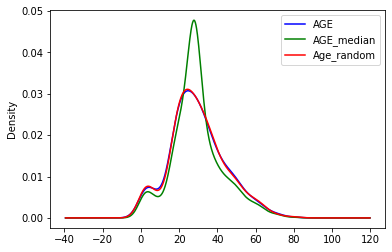

In [39]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind ="kde" , color ="blue" ,ax=ax , label = "AGE")
df['Age_median'].plot(kind ="kde" , color ="green" ,ax=ax , label = "AGE_median")
df['Age_random'].plot(kind = "kde" , color = "red" ,ax=ax ,label = "Age_random")
plt.legend()

#### insights from the above distrubution graph 
              
              Advantages : - 
               1. the kde of the original age and Age_random is same .
               2. there is no change in  age distrubution  and hence no change in variance 
               
               Disadvantages : - 
                            1. Not applicable in every situation 

# Handling the Categorical Missing values 

#### All the methods : - 
                        1. Frequent category imputation 
                        2.mode imputation
                        3.Capturing NAN values with new feature (same as previous)
                        4. using classifier algorithm to predict the missing categories
                        5.Using the cluster (kmean, agglomerative )
                    

In [56]:
data = pd.read_csv(r"F:\kaggle compitition\house_prices.csv")
data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [57]:
data.shape

(1460, 81)

In [58]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [59]:
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
df = data.copy()

In [55]:
# here we'll use only ['BsmtQual' , 'GarageType',  'FireplaceQu','SalePrice'] cols

## method1 : -  mode imputation : - 
                it's most famous technique to replace categorical missing value , as  it is easy to implement
                In this method we replace the na values wth the MODE
                sometime, this methods leads to inbalance  ...


In [61]:
df = df[['BsmtQual' , 'GarageType',  'FireplaceQu','SalePrice']]

In [62]:
df.head()

,BsmtQual,GarageType,FireplaceQu,SalePrice
0,Gd,Attchd,NaN,208500
1,Gd,Attchd,TA,181500
2,Gd,Attchd,TA,223500
3,TA,Detchd,Gd,140000
4,Gd,Attchd,TA,250000


In [63]:
df.isna().sum()

BsmtQual        37
GarageType      81
FireplaceQu    690
SalePrice        0
dtype: int64

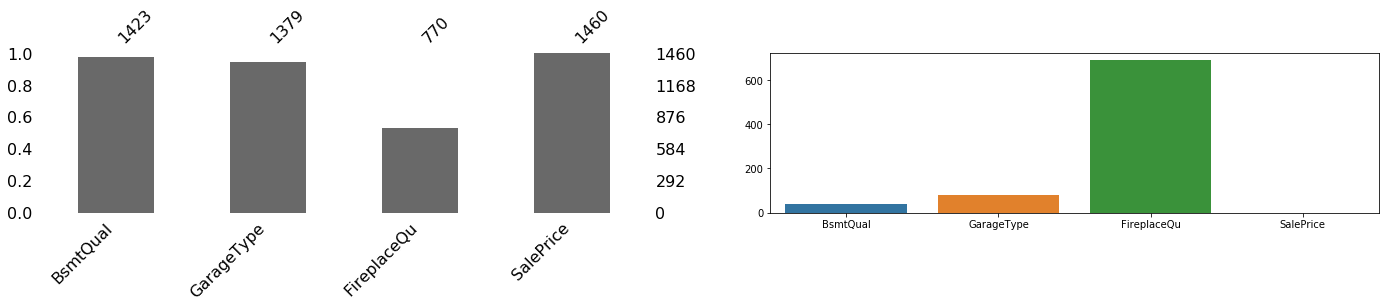

In [77]:
plt.subplot(3,2,1)
ms.bar(df)
plt.subplot(3,2,2)
sns.barplot(df.columns , df.isna().sum()  )


In [80]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [81]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [86]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [83]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [84]:
for i in ['BsmtQual' , 'GarageType' ,'FireplaceQu' ] :
    print (i +"unique")
    print (df[i].unique())
    print( "*" * 40 )

BsmtQualunique
['Gd' 'TA' 'Ex' nan 'Fa']
****************************************
GarageTypeunique
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
****************************************
FireplaceQuunique
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
****************************************


In [106]:
def impute_nan1(data , variable) : 
    mode = data [variable].mode()  # here , type(mode)= object : 
    data[variable+"_mode"] = data[variable].fillna(mode.to_list) # abject --->list

In [107]:
for feature in ['BsmtQual' , 'GarageType' ,'FireplaceQu' ] :
    impute_nan1(df ,feature)

In [108]:
df.head()

,BsmtQual,GarageType,FireplaceQu,SalePrice,BsmtQual_mode,GarageType_mode,FireplaceQu_mode
0,Gd,Attchd,NaN,208500,Gd,Attchd,<bound method IndexOpsMixin.tolist of 0 Gd\...
1,Gd,Attchd,TA,181500,Gd,Attchd,TA
2,Gd,Attchd,TA,223500,Gd,Attchd,TA
3,TA,Detchd,Gd,140000,TA,Detchd,Gd
4,Gd,Attchd,TA,250000,Gd,Attchd,TA


In [109]:
df[['BsmtQual_mode','GarageType_mode' ,  'FireplaceQu_mode']].isna().sum()

BsmtQual_mode       0
GarageType_mode     0
FireplaceQu_mode    0
dtype: int64

## method 2 ---> Frequent category imputation

                    here we replace the null values by most frequent categories 

In [126]:
## compute frequency of every feature 
for feature in ['BsmtQual' , 'GarageType' ,'FireplaceQu' ] :
    print(feature + "===>")
    print (df[feature].value_counts())
    most_frequent_categories = df[feature].value_counts().index[0]
    print(most_frequent_categories , "--> " ,  df[feature].value_counts()[0])
    print("*"*40)

BsmtQual===>
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA -->  649
****************************************
GarageType===>
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd -->  870
****************************************
FireplaceQu===>
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Gd -->  380
****************************************


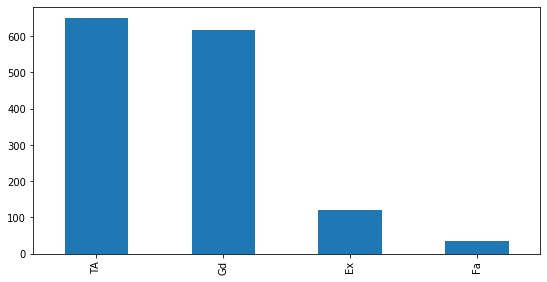

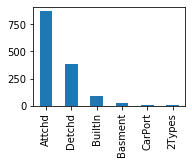

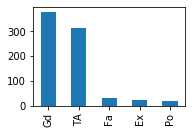

In [137]:
fig, ax = plt.subplots(figsize=(20, 10))
for feature in ['BsmtQual' , 'GarageType' ,'FireplaceQu' ] :
    x= 1 
    plt.subplot(2,2,x)
    #plt.figure(figsize=(20,10))
    df[feature].value_counts().sort_values(ascending = False).plot(kind = "bar")
    plt.show()
    x+=1

    

## method 3 :- .Capturing NAN values with new feature (same as previous)

              In this methos , we create the new feature in which the location where the Value is null(NAN) we place it as one(1) , else by 0
             and the origional feature /column NAN values replace by the  mode 

In [138]:

def impute_nan2(data , variable ): #here we try to replace NAN by the median 
    
    data[variable +"_NAN2"] = np.where(data[variable].isna() , 1, 0 ) # here we create the new feature
    data[variable +"_mode2"] = data[variable].fillna (df[variable].mode().tolist) # replacing the NAN value by the mode


In [140]:
for i in ['BsmtQual','GarageType' ,  'FireplaceQu'] :
    impute_nan2(df , i )

In [141]:
df.head(4)

,BsmtQual,GarageType,FireplaceQu,SalePrice,BsmtQual_mode,GarageType_mode,FireplaceQu_mode,BsmtQual_NAN2,BsmtQual_mode2,GarageType_NAN2,GarageType_mode2,FireplaceQu_NAN2,FireplaceQu_mode2
0,Gd,Attchd,NaN,208500,Gd,Attchd,<bound method IndexOpsMixin.tolist of 0 Gd\...,0,Gd,0,Attchd,1,<bound method IndexOpsMixin.tolist of 0 Gd\...
1,Gd,Attchd,TA,181500,Gd,Attchd,TA,0,Gd,0,Attchd,0,TA
2,Gd,Attchd,TA,223500,Gd,Attchd,TA,0,Gd,0,Attchd,0,TA
3,TA,Detchd,Gd,140000,TA,Detchd,Gd,0,TA,0,Detchd,0,Gd


In [139]:
df[['BsmtQual_mode2','GarageType_mode2' ,  'FireplaceQu_mode2']].isna().sum()

BsmtQual_mode       0
GarageType_mode     0
FireplaceQu_mode    0
dtype: int64

## method 4 :- use some classifier algorithm to predict the missing values : - 

                    In this method we create the classifier model to predict the missing values \
                    

## method 5 :- using clustering technique 

       In this method we use cluste to finding out in which cluster the missing data is lies and according tio that we try to predict the 
        missing value 